<a href="https://colab.research.google.com/github/henriquecl/Aprendendo_Python/blob/master/AnalisePE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJETO ALURA ANÁLISE DOS DADOS ENEM 2019 PERNAMBUCO**

## **SEPARAÇÃO DOS DADOS APENAS DO ESTADO DE PERNAMBUCO**

### **Quebra dos microdados do ENEM 2019**

####Inicialmente, tentou-se rodar todo o .csv de microdados do enem 2019 no google colab, e devido ao grande quantitativo de dados não obteve-se êxito. Após uma breve busca no google, foi encontrado do software csvsplitter (link de download: https://www.erdconcepts.com/dbtoolbox/csvsplitter/csvsplitter.zip). A função desse software é quebrar o .csv principal em .csv menores de acordo com o desejado pelo usuário. Como o arquivo possui 3gb, foi estimado que arquivos menores de 300mb conseguiriam ser lidos pela biblíoteca pandas de maneira correta. O tamanho selecionado foi o adequado para o funcionamento correto, entretanto, o software ao fazer a quebra do arquivo em arquivo menores muda o tipo de encode do arquivo . A biblioteca pandas cujo por padrão, utiliza encode='utf-8', não conseguia fazer a leitura do novo arquivo. Sendo assim, para descobrir o tipo de encoding que o arquivo estava, utilizou-se a biblioteca chardet, cuja é possivel descobrir qual o encoding do arquivo. Segue código abaixo.
```
import chardet

# Checando o tipo de encoding do arquivo
with open("caminho_do_csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
print(result)
----------------------------------------------------------------------
retorno do código:
{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}
```

####Com o tipo de encoding em mãos, foi possivel realizar a leitura do arquivo pela biblioteca pandas alterando o tipo de encondig da mesma.
```
dados = pd.read_csv("dados00.csv", encoding='ISO-8859-1')
```








### **Filtrando os dados apenas de pernambuco**

#### Para filtrar os dados, utilizou-se a biblioteca Pandas e o método .query() para que apenas as linhas cujas as colunas tivessem o parâmetro SG_UF_PROVA == PE fossem selecionadas e um novo .csv fosse criado com essa caracteristica. Note que, essa operação teve que ser realizada 10 vezes, visto que o .csv de microdados foi separado em 11 partes.
```
dados = pd.read_csv("dados00.csv", encoding='ISO-8859-1') # Lendo o csv
novo_df = dados.query("SG_UF_PROVA == 'PE'")    # Realizando o filtro
novo_df.to_csv("dado00_PE.csv")                 # Criando um novo csv apenas das provas cujo foram realizadas no estado de Pernambuco.
```
#### Após esse processo, temos 11 novos .csv com os dados desejado. 


### **Juntando todos os .csv em apenas um só**

#### Para juntar todos os pequenos .csv utilizou-se a biblíoteca pandas. Leu-se todos os arquivos individualmente, e depois com o auxilio do método pd.concat() criou-se um dataframe que corresponde a união de todas as linhas dos 11 dataframes exportados em um único dataframe. Após isso, com o .to_csv criou-se o dataframe de TODOS os participante do ENEM 2019 que fizeram a prova em Pernambuco.



```
import pandas as pd

dado_zero = pd.read_csv("dado00_PE.csv", encoding= 'ISO-8859-1' )
dado_um = pd.read_csv("dado01_PE.csv", encoding='ISO-8859-1')
dado_dois = pd.read_csv("dado02_PE.csv", encoding='ISO-8859-1')
dado_tres = pd.read_csv("dado03_PE.csv", encoding='ISO-8859-1')
dado_quatro = pd.read_csv("dado04_PE.csv", encoding='ISO-8859-1')
dado_cinco = pd.read_csv("dado05_PE.csv", encoding='ISO-8859-1')
dado_seis = pd.read_csv("dado06_PE.csv", encoding='ISO-8859-1')
dado_sete = pd.read_csv("dado07_PE.csv", encoding='ISO-8859-1')
dado_oito = pd.read_csv("dado08_PE.csv", encoding='ISO-8859-1')
dado_nove = pd.read_csv("dado09_PE.csv", encoding='ISO-8859-1')
dado_dez = pd.read_csv("dado10_PE.csv", encoding='ISO-8859-1')

datape = pd.concat([dado_zero, dado_um, dado_dois, dado_tres,dado_quatro,dado_cinco,dado_seis,dado_sete,dado_oito,dado_nove,dado_dez ])
datape.to_csv("DadosPE.csv")
```



## **IMPORTANDO OS DADOS E CRIANDO ALGUMAS VARIÁVEIS UTILIZADAS NO PROJETO**

In [250]:
import pandas as pd
from google.colab import drive 
pd.set_option('display.max_columns', 5)
drive.mount('/content/drive')
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# DataSet dos candidatos do ENEM 2019 de Pernambuco
data = pd.read_csv('/content/drive/My Drive/DadosPE_FINAL_REDUZIDO.csv')
#318 275 inscrições
# Separando os alunos devido ao local estudado             # 275318 inscrições
alunos_escola_publica_privada = data.query("TP_ESCOLA == 2 and TP_ESCOLA == 3") 
alunos_escola_nao_informada = data.query("TP_ESCOLA == 1") # 202080  inscrições
alunos_escola_publica = data.query("TP_ESCOLA == 2")       # 63322  inscrições
alunos_escola_privada = data.query("TP_ESCOLA == 3")       # 9916 inscrições
alunos_escola_exterior = data.query("TP_ESCOLA == 4")      # 0      inscrições

# Separando por presença na prova
alunos_escola_nao_informada_presentes = alunos_escola_nao_informada.query("NU_NOTA_CN != 'NaN' and NU_NOTA_CH != 'NaN' and NU_NOTA_LC != 'NaN' and NU_NOTA_MT != 'NaN'")
alunos_escola_publica_presentes = alunos_escola_publica.query("NU_NOTA_CN != 'NaN' and NU_NOTA_CH != 'NaN' and NU_NOTA_LC != 'NaN' and NU_NOTA_MT != 'NaN'")
alunos_escola_privada_presentes = alunos_escola_privada.query("TP_PRESENCA_CN == 1 and TP_PRESENCA_CH == 1 and TP_PRESENCA_LC == 1 and TP_PRESENCA_MT == 1")

# Separação por sexo dos presentes

alunos_escola_nao_informada_presentes_feminino = alunos_escola_nao_informada_presentes.query("TP_SEXO == 'F'") #85867
alunos_escola_nao_informada_presentes_masculino = alunos_escola_nao_informada_presentes.query("TP_SEXO == 'M'") # 58435
alunos_escola_publica_presentes_feminino = alunos_escola_publica_presentes.query("TP_SEXO == 'F'")              # 30056
alunos_escola_publica_presentes_masculino = alunos_escola_publica_presentes.query("TP_SEXO == 'M'")             # 21485
alunos_escola_privada_presentes_feminino = alunos_escola_privada_presentes.query("TP_SEXO == 'F'")              # 5101
alunos_escola_privada_presentes_masculino = alunos_escola_privada_presentes.query("TP_SEXO == 'M'")             # 4473



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [251]:
# DataSet dos candidatos do ENEM 2019 de Pernambuco
data = pd.read_csv('/content/drive/My Drive/DadosPE_FINAL_REDUZIDO.csv')
#318 275 inscrições

In [252]:
notas = ["NU_NOTA_CN", "NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT", "NU_NOTA_REDACAO"]

## **ANALISE DE NÚMERO DE FALTAS DE ACORDO COM O TIPO DE ESCOLA DO PARTICIPANTE E SUA RENDA**


In [432]:
# Alunos de escola privada que faltaram  algum dia de prova == 342
pd.set_option('display.max_rows', 5)
alunos_escola_privada_faltantes = alunos_escola_privada.query("NU_NOTA_CN == 'NaN' or NU_NOTA_CH == 'NaN' or NU_NOTA_LC == 'NaN' or NU_NOTA_MT == 'NaN' or NU_NOTA_REDACAO == 'NaN' ")
len(alunos_escola_privada_faltantes)
# 342 ------- 3.45% : Percentual em cima do número de alunos que são de escola privada

342

In [433]:
# Alunos de escola privada que faltaram  algum dia de prova e possuem renda familiar inferior a 2 salários mínimos 
len(alunos_escola_privada_faltantes.query("Q006 == 'A' or Q006 == 'B'"))
# 71 ------- 20.7%  : Percentual em cima do numero de alunos faltantes de escola privada

71

In [434]:
# Alunos de escola pública que faltaram  algum dia de prova == 11781
alunos_escola_publica_faltantes = alunos_escola_publica.query("NU_NOTA_CN == 'NaN' or NU_NOTA_CH == 'NaN' or NU_NOTA_LC == 'NaN' or NU_NOTA_MT == 'NaN' or NU_NOTA_REDACAO == 'NaN' ")
# 11781 ------- 18.6% :  Percentual em cima do número de alunos que são de escola pública

In [435]:
# Alunos de escola pública que faltaram  algum dia de prova e possuem renda familiar inferior a 2 salários mínimos 
#alunos_escola_publica_faltantes.query("Q006 == 'A' or Q006 == 'B' ")
# 8166  ------- 69.3% :  Percentual em cima do numero de alunos faltantes de escola pública

In [436]:
# Alunos sem escola declarada que faltaram algum dia de prova == 57778
alunos_escola_nao_informada_faltantes = alunos_escola_nao_informada.query("NU_NOTA_CN == 'NaN' or NU_NOTA_CH == 'NaN' or NU_NOTA_LC == 'NaN' or NU_NOTA_MT == 'NaN' or NU_NOTA_REDACAO == 'NaN' ")
# 57778 ---- 28.6%   :  Percentual em cima do número de alunos que são não declararam tipo de escola

In [437]:
# Alunos sem escola declarada que faltaram  algum dia de prova e possuem renda familiar inferior a 2 salários mínimos 
#alunos_escola_nao_informada_faltantes.query("Q006 == 'A' or Q006 == 'B' ")
# 26842 ---- 46.45%  : Percentual em cima do numero de alunos faltantes sem escola declarada

#### Conclusão das faltas: Dentre os alunos de escola privada que se matricularam no ENEM, apenas 3.45% deles algum dia de prova. Já no caso das escolas públicas, esse número sobe para 18.6%. Para o caso dos alunos que não informaram o tipo de escola cujo cursaram o ensino médio, 28.6% faltaram a prova.

#### Conclusão da rendas dos alunos que faltaram: Dos alunos de escola privada que faltaram algum dia de prova, 20.7% possuem renda familiar menor que 2 salários mínimos. Esse número para os alunos de escola pública é de 69.3%. Para os que não declararam o tipo de escola que cursaram o ensino médio, esse valor é de 46.45%

## **ANALISE DA MÉDIA DAS NOTAS DE ACORDO COM A ESCOLA DO PARTICIPANTE**


In [259]:
lista_media_notas_privada = list(alunos_escola_privada_presentes[notas].mean())
lista_media_notas_publica = list(alunos_escola_publica_presentes[notas].mean())

In [260]:
lista_media_notas_nao_informada = list(alunos_escola_nao_informada_presentes[notas].mean())


In [261]:
lista_media_notas_publica = list(alunos_escola_publica_presentes[notas].mean())
lista_media_notas_publica 
diferenca =[] 
for i in range(len(lista_media_notas_privada)):
  a = round((lista_media_notas_privada[i]/lista_media_notas_publica[i] - 1)*100,2)
  b = str(a) + "%"
  diferenca.append(b)
diferenca

['16.41%', '15.59%', '11.36%', '21.21%', '31.55%']

<Figure size 720x576 with 0 Axes>

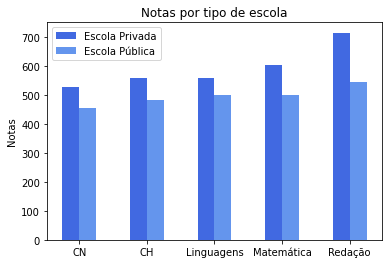

In [438]:
plt.figure(figsize=(10,8))
materias2 = ["CN", "CH", "Linguagens", "Matemática", "Redação"]
x = np.arange(len(materias2))
width = 0.25
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lista_media_notas_privada,  color = 'royalblue', width= 0.25, label='Escola Privada')
rects2 = ax.bar(x + width/2, lista_media_notas_publica,color = 'cornflowerblue', width= 0.25, label='Escola Pública')
ax.set_ylabel('Notas')
ax.set_title('Notas por tipo de escola')
ax.set_xticks(x)
ax.set_xticklabels(materias2)
ax.legend()
plt.show()

#### Conclusão: Em todas as provas as pontuações dos alunos que cursaram ensino médio em  escolas privadas são superiores as escolas públicas.


           

> CN: 16.41% Superior

> CH: 15,59% Superior

>  LC: 11,36% Superior

> MT: 21,21% Superior

> Redacação: 31,55% Superior




## **ANALISE DA MÉDIA DAS NOTAS DE ACORDO COM O SEXO DO PARTICIPANTE COM O SEXO OPOSTO NO MESMO TIPO DE ESCOLA**

<Figure size 720x576 with 0 Axes>

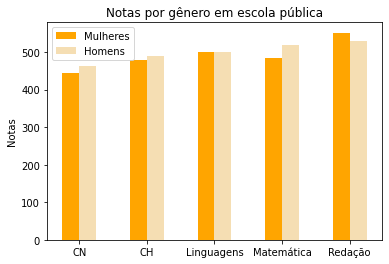

In [431]:
lista_media_notas_feminina_publica  =  list(round(alunos_escola_publica_presentes_feminino[notas].mean(),2))
lista_media_notas_masculino_publica =  list(round(alunos_escola_publica_presentes_masculino[notas].mean(),2))
lista_media_notas_feminina_privada  =  list(round(alunos_escola_privada_presentes_feminino[notas].mean(),2))
lista_media_notas_masculino_privada =  list(round(alunos_escola_privada_presentes_masculino[notas].mean(),2))

materias = ["Ciências da Natureza", "Ciências Humanas", "Linguagens e Código", "Matemática", "Redação"]
dif_notas_publica_por_sexo  = []
dif_notas_privada_por_sexo  = []
dif_notas_escolas_feminino  = []
dif_notas_escolas_masculino = []

for i in range(len(lista_media_notas_feminina_publica)):
    k = round(((lista_media_notas_feminina_publica[i] / lista_media_notas_masculino_publica[i]) - 1) * 100,2)
    k1 = str(materias[i]) +": " +str(k) + "%"
    dif_notas_publica_por_sexo.append(k1)



for i2 in range(len(lista_media_notas_feminina_privada)):
    k = round((( lista_media_notas_feminina_privada[i2] / lista_media_notas_masculino_privada[i2] ) - 1) * 100,2)
    k1 = str(materias[i2]) +": " +str(k) + "%"
    dif_notas_privada_por_sexo.append(k1)



plt.figure(figsize=(10,8))
x = np.arange(len(materias2))
width = 0.25
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lista_media_notas_feminina_publica,color= 'orange',  width=0.25, label='Mulheres')
rects2 = ax.bar(x + width/2, lista_media_notas_masculino_publica,color= 'wheat',  width=0.25, label='Homens')
ax.set_ylabel('Notas')
ax.set_title('Notas por gênero em escola pública')
ax.set_xticks(x)
ax.set_xticklabels(materias2)
ax.legend()
plt.show()

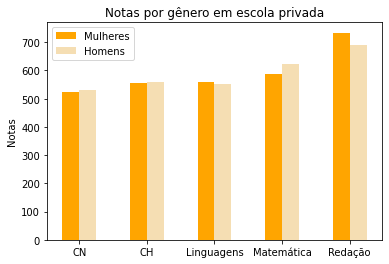

In [430]:

x = np.arange(len(materias2))
width = 0.25
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lista_media_notas_feminina_privada,color= 'orange',  width=0.25, label='Mulheres')
rects2 = ax.bar(x + width/2, lista_media_notas_masculino_privada,color = 'wheat' ,width=0.25, label='Homens')
ax.set_ylabel('Notas')
ax.set_title('Notas por gênero em escola privada')
ax.set_xticks(x)
ax.set_xticklabels(materias2)
ax.legend()
plt.show()

Conclusões obtidas: 
    

> - Como já esperado, não há diferença gritante entre as notas obtidas por homens e mulheres cujos estudaram no mesmo tipo de escola.








## **ANALISE DA MÉDIA DAS NOTAS DE ACORDO COM O SEXO DO PARTICIPANTE COM O DE MESMO SEXO EM TIPOS DE ESCOLAS DIFERENTES**

['Ciências da Natureza: 17.61%', 'Ciências Humanas: 16.22%', 'Linguagens e Código: 12.04%', 'Matemática: 21.26%', 'Redação: 33.09%', 'Ciências da Natureza: 17.61%', 'Ciências Humanas: 16.22%', 'Linguagens e Código: 12.04%', 'Matemática: 21.26%', 'Redação: 33.09%', 'Ciências da Natureza: 17.61%', 'Ciências Humanas: 16.22%', 'Linguagens e Código: 12.04%', 'Matemática: 21.26%', 'Redação: 33.09%', 'Ciências da Natureza: 17.61%', 'Ciências Humanas: 16.22%', 'Linguagens e Código: 12.04%', 'Matemática: 21.26%', 'Redação: 33.09%', 'Ciências da Natureza: 17.61%', 'Ciências Humanas: 16.22%', 'Linguagens e Código: 12.04%', 'Matemática: 21.26%', 'Redação: 33.09%']
['Ciências da Natureza: 14.6%', 'Ciências Humanas: 14.62%', 'Linguagens e Código: 10.56%', 'Matemática: 20.28%', 'Redação: 30.29%', 'Ciências da Natureza: 14.6%', 'Ciências Humanas: 14.62%', 'Linguagens e Código: 10.56%', 'Matemática: 20.28%', 'Redação: 30.29%', 'Ciências da Natureza: 14.6%', 'Ciências Humanas: 14.62%', 'Linguagens e Cód

<Figure size 720x576 with 0 Axes>

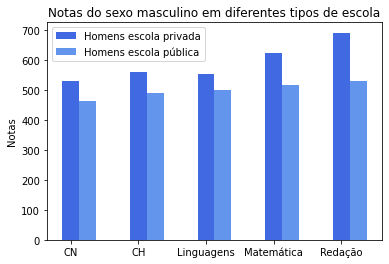

In [388]:
for i3 in range(len(lista_media_notas_feminina_privada)):
    k2 = round(((lista_media_notas_feminina_privada[i3] / lista_media_notas_feminina_publica[i3]) - 1) * 100,2)
    k3 = str(materias[i3]) +": " +str(k2) + "%"
    dif_notas_escolas_feminino.append(k3)



for i4 in range(len(lista_media_notas_feminina_privada)):
    k4 = round(((lista_media_notas_masculino_privada[i4] / lista_media_notas_masculino_publica[i4]) - 1) * 100,2)
    k5 = str(materias[i4]) +": " +str(k4) + "%"
    dif_notas_escolas_masculino.append(k5)


print(dif_notas_escolas_feminino)
print(dif_notas_escolas_masculino)
plt.figure(figsize=(10,8))
x = np.arange(len(materias2))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x + 0.00, lista_media_notas_masculino_privada, color = 'royalblue', width = 0.25, label='Homens escola privada')
rects2 = ax.bar(x + 0.25, lista_media_notas_masculino_publica, color = 'cornflowerblue', width = 0.25, label='Homens escola pública')
ax.set_ylabel('Notas')
ax.set_title('Notas do sexo masculino em diferentes tipos de escola')
ax.set_xticks(x)
ax.set_xticklabels(materias2)
ax.legend()
plt.show()


<Figure size 720x576 with 0 Axes>

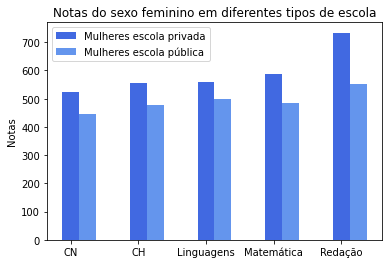

In [384]:
plt.figure(figsize=(10,8))
x = np.arange(len(materias2))
width = 0.35
fig, ax = plt.subplots()

rects1 = ax.bar(x + 0.00, lista_media_notas_feminina_privada, color = 'royalblue' , width = 0.25, label='Mulheres escola privada')
rects2 = ax.bar(x + 0.25, lista_media_notas_feminina_publica,  color = 'cornflowerblue', width =0.25 , label='Mulheres escola pública')
ax.set_ylabel('Notas')
ax.set_title('Notas do sexo feminino em diferentes tipos de escola')
ax.set_xticks(x)
ax.set_xticklabels(materias2)
ax.legend()
plt.show()

Conclusões: Como já analisado anteriormente na diferença de notas entre as escolas (pública e privada), o mesmo cenário ocorre quando analisamos no caso especifico do sexo masculino e do sexo feminino. Os estudantes que cursaram ensino médico em escola privada possuem uma larga vantagem sobre os que não cursaram.

No caso das mulheres, a superioridade percentual entre as notas foram:


> Ciências da Natureza: 17.61%

> Ciências Humanas: 16.22%

> Linguagens e Código: 12.04%

> Matemática: 21.26%

> Redação: 33.09%


Já no caso dos homens:

> Ciências da Natureza: 14.6%

> Ciências Humanas: 14.62%

> Linguagens e Código: 10.56%

> Matemática: 20.28%

> Redação: 30.29%

## **MÉDIA DAS NOTAS DE ACORDO COM O IDH DO MUNICÍPIOS**

### Para analisar as notas pelo IDH foi necessario procurar qual o IDH dos municíos de Pernambuco e selecionar 5 de cada faixa do índice, cujo é classificado como: 
> Muito Alto – de 0,800 a 1000

> Alto – de 0,700 a 0,799

> Médio – de 0,600 a 0,699

> Baixo – de 0,500 a 0,599

> Muito Baixo – de 0,000 a 0,499

### Infelizmente, em Pernambuco infelizmente não existe nenhum município com IDH muito alto, e felizmente apenas um município com IDH muito baixo. Logo, irá ser adquirido resultados apenas das faixas: Alto, Médio e Baixo.


> Alto – de 0,700 a 0,799
*   Fernando de Noronha 0,788
*   Recife	0,772
*   Olinda	0.735
*   Paulista	0.732
*   Petrolina 0,702


> Médio – de 0,600 a 0,699
*   Araripina	0.602
*   Salgueiro	0.669
*   Carpina	0,680  
*   Triunfo 0,670
*   Surubim	0.635

> Baixo – de 0,500 a 0,599
*  Mirandiba	0.591
*  Santa Maria da Boa Vista	0.590
*  Agrestina	0.592
*  Cupira	0.592
*  Ouricuri	0.572


** Adendo: As cidades com IDH alto e médio foram selecionadas atráves da ferramenta do google de gerar números aleatórios. As de IDH baixo foram selecionadas por tentativa e erro, visto que muitas não possuem enem em seu municipio e tem que ir para outros municipios para realizar a prova.














In [369]:
# Filtrando apenas as cidades de IDH alto e fazendo a média de notas de todas.
idh_alto = data.query("NO_MUNICIPIO_PROVA == 'Fernando de Noronha' or NO_MUNICIPIO_PROVA == 'Recife' or  NO_MUNICIPIO_PROVA == 'Olinda' or NO_MUNICIPIO_PROVA == 'Paulista' or NO_MUNICIPIO_PROVA == 'Petrolina' ")
idh_alto_presentes = idh_alto.query("NU_NOTA_CN != 'NaN' and NU_NOTA_CH != 'NaN' and NU_NOTA_LC != 'NaN' and NU_NOTA_MT != 'NaN'") #74401
media_idh_alto = idh_alto_presentes[notas].mean()
#df_idh_alto = pd.DataFrame(idh_alto_presentes[notas].mean())
#sns.barplot(data= df_idh_alto, y=0 )


In [370]:
# Filtrando apenas as cidades de IDH médio e fazendo a média de notas de todas.
idh_medio = data.query("NO_MUNICIPIO_PROVA == 'Araripina' or NO_MUNICIPIO_PROVA == 'Salgueiro' or  NO_MUNICIPIO_PROVA == 'Carpina' or NO_MUNICIPIO_PROVA == 'Triunfo' or NO_MUNICIPIO_PROVA == 'Surubim' ")
idh_medio_presentes = idh_medio.query("NU_NOTA_CN != 'NaN' and NU_NOTA_CH != 'NaN' and NU_NOTA_LC != 'NaN' and NU_NOTA_MT != 'NaN'") # 11055
media_idh_medio = idh_medio_presentes[notas].mean()
media_idh_medio


NU_NOTA_CN         462.435007
NU_NOTA_CH         491.522280
NU_NOTA_LC         506.658372
NU_NOTA_MT         514.501049
NU_NOTA_REDACAO    570.538218
dtype: float64

<Figure size 720x576 with 0 Axes>

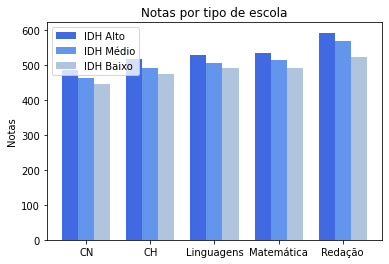

In [383]:
# Filtrando apenas as cidades de IDH baixo e fazendo a média de notas de todas.
idh_baixo = data.query("NO_MUNICIPIO_PROVA == 'Mirandiba' or NO_MUNICIPIO_PROVA == 'Santa Maria da Boa Vista' or  NO_MUNICIPIO_PROVA == 'Agrestina' or NO_MUNICIPIO_PROVA == 'Cupira' or NO_MUNICIPIO_PROVA == '	Ouricuri' ")
idh_baixo_presentes = idh_baixo.query("NU_NOTA_CN != 'NaN' and NU_NOTA_CH != 'NaN' and NU_NOTA_LC != 'NaN' and NU_NOTA_MT != 'NaN'") # 4091
media_idh_baixo =  idh_baixo_presentes[notas].mean()
media_idh_baixo[0]
#sns.barplot(data=media_idh_baixo)
plt.figure(figsize=(10,8))
materias2 = ["CN", "CH", "Linguagens", "Matemática", "Redação"]
x = np.arange(len(materias2))
width = 0.25
fig, ax = plt.subplots()
ax.bar(x + 0.00, media_idh_alto, color = 'royalblue', width = 0.25, label='IDH Alto')
ax.bar(x + 0.25, media_idh_medio,color = 'cornflowerblue',  width=0.25, label='IDH Médio')
ax.bar(x + 0.50, media_idh_baixo,color = 'lightsteelblue', width=0.25 ,label='IDH Baixo')
ax.set_ylabel('Notas')
ax.set_title('Notas por tipo de escola')
ax.set_xticks(x + 0.25)
ax.set_xticklabels(materias2)
ax.legend()
plt.show()

## **ANÁLISE DAS MÉDIAS DOS CANDIDATOS DE ACORDO COM A RAÇA DECLARADA QUE COMPARECERAM NA PROVA**

<Figure size 720x576 with 0 Axes>

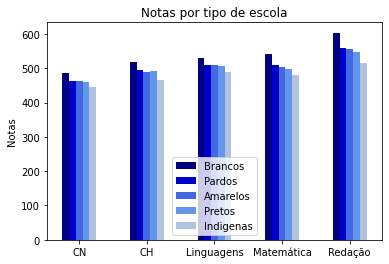

In [425]:
brancos = data.query("TP_COR_RACA == 1") 
pretos = data.query("TP_COR_RACA == 2")
pardos = data.query("TP_COR_RACA == 3")
amarelos = data.query("TP_COR_RACA == 4")
indigenas = data.query("TP_COR_RACA == 5")
media_brancos_notas = brancos[notas].dropna().mean()      # 60498
media_pretos_notas = pretos[notas].dropna().mean()        # 23686
media_pardos_notas = pardos[notas].dropna().mean()         # 107985
media_amarelos_notas = amarelos[notas].dropna().mean()     # 5829
media_indigenas_notas = indigenas[notas].dropna().mean()   # 2650

#print(data[notas].mean().dropna())
plt.figure(figsize=(10,8))
materias2 = ["CN", "CH", "Linguagens", "Matemática", "Redação"]
x = np.arange(len(materias2))
width = 0.25
fig, ax = plt.subplots()
ax.bar(x + 0.00, media_brancos_notas , color = 'navy' , width = 0.1, label='Brancos')
ax.bar(x + 0.1, media_pardos_notas, color = 'mediumblue', width=0.1 ,label='Pardos')
ax.bar(x + 0.2, media_amarelos_notas,color = 'royalblue', width=0.1 ,label='Amarelos')
ax.bar(x + 0.3, media_pretos_notas, color = 'cornflowerblue' ,  width=0.1, label='Pretos')
ax.bar(x + 0.4, media_indigenas_notas,color = 'lightsteelblue', width=0.1 ,label='Indigenas')
ax.set_ylabel('Notas')
ax.set_title('Notas por tipo de escola')
ax.set_xticks(x + 0.2)
ax.set_xticklabels(materias2)
ax.legend()
plt.show()



## **CONCLUSÃO GERAL DO ESTUDO**

### Com base em todos os dados e  gráficos exibidos acima podemos concluir com muita acurácia que o estado de pernambuco é completamente desigual em oportunidade para seus cidadões. Podemos inferir que, dependendo do município de nascimento, raça e tipo de escola cujo o aluno estudou o ensino médio irão definir a pontuação de um aluno. Em todas as análises realizadas, as classes sociais cu